# Demo of `LaPDXYTransform`

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.rcParams["figure.figsize"] = [10.5, 0.56 * 10.5]

In [3]:
try:
    from bapsf_motion.transform import LaPDXYTransform
except ModuleNotFoundError:
    from pathlib import Path

    HERE = Path().cwd()
    BAPSF_MOTION = (HERE / ".." / ".." / ".." ).resolve()
    sys.path.append(str(BAPSF_MOTION))
    
    from bapsf_motion.transform import LaPDXYTransform

In [4]:
tr = LaPDXYTransform(
    ("x", "y"),
    pivot_to_center=57.288,
    pivot_to_drive=134.0,
    # probe_axis_offset=10.00125,
    probe_axis_offset=20.16125,
)

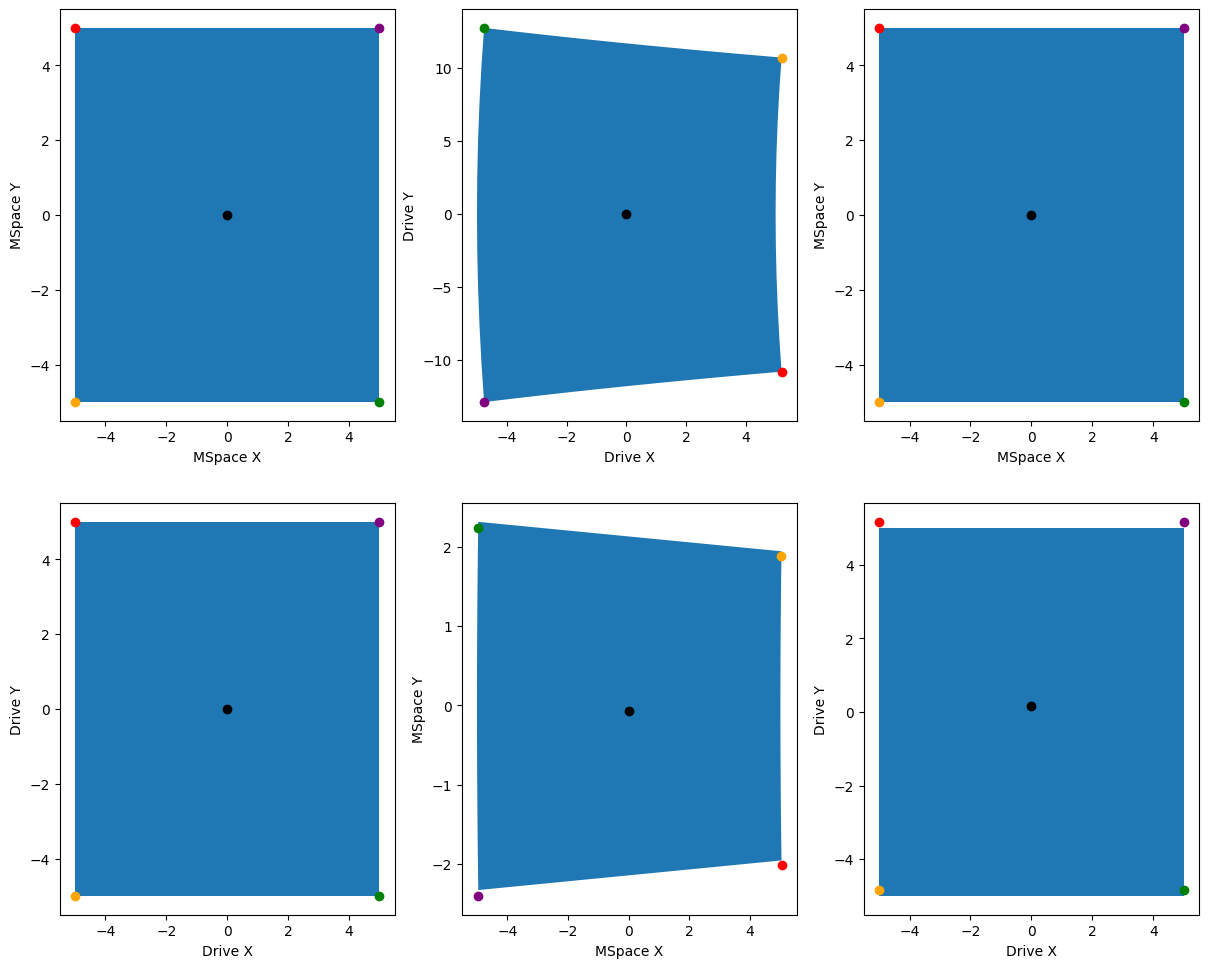

In [5]:
figwidth, figheight = plt.rcParams["figure.figsize"]
figwidth = 1.4 * figwidth
figheight = 2.0 * figheight
fig, axs = plt.subplots(2, 3, figsize=[figwidth, figheight])

axs[0,0].set_xlabel("MSpace X")
axs[0,0].set_ylabel("MSpace Y")
axs[0,1].set_xlabel("Drive X")
axs[0,1].set_ylabel("Drive Y")
axs[0,2].set_xlabel("MSpace X")
axs[0,2].set_ylabel("MSpace Y")

points = np.zeros((40, 2))
points[0:10, 0] = np.linspace(-5, 5, num=10, endpoint=False)
points[0:10, 1] = 5 * np.ones(10)
points[10:20, 0] = 5 * np.ones(10)
points[10:20, 1] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 0] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 1] = -5 * np.ones(10)
points[30:40, 0] = -5 * np.ones(10)
points[30:40, 1] = np.linspace(-5, 5, num=10, endpoint=False)

dpoints = tr(points, to_coords="drive")
mpoints = tr(dpoints, to_coords="motion_space")

axs[0,0].fill(points[...,0], points[...,1])
axs[0,1].fill(dpoints[...,0], dpoints[...,1])
axs[0,2].fill(mpoints[...,0], mpoints[...,1])

for pt, color in zip(
    [
        [-5, 5],
        [-5, -5],
        [5, -5],
        [5, 5],
        [0, 0]
    ],
    ["red", "orange", "green", "purple", "black"]
):
    dpt = tr(pt, to_coords="drive")
    mpt = tr(dpt, to_coords="motion_space")
    axs[0,0].plot(pt[0], pt[1], 'o', color=color)
    axs[0,1].plot(dpt[0], dpt[1], 'o', color=color)
    axs[0,2].plot(mpt[0], mpt[1], 'o', color=color)

##

axs[1,0].set_xlabel("Drive X")
axs[1,0].set_ylabel("Drive Y")
axs[1,1].set_xlabel("MSpace X")
axs[1,1].set_ylabel("MSpace Y")
axs[1,2].set_xlabel("Drive X")
axs[1,2].set_ylabel("Drive Y")

points = np.zeros((40, 2))
points[0:10, 0] = np.linspace(-5, 5, num=10, endpoint=False)
points[0:10, 1] = 5 * np.ones(10)
points[10:20, 0] = 5 * np.ones(10)
points[10:20, 1] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 0] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 1] = -5 * np.ones(10)
points[30:40, 0] = -5 * np.ones(10)
points[30:40, 1] = np.linspace(-5, 5, num=10, endpoint=False)

mpoints = tr(points, to_coords="motion_space")
dpoints = tr(mpoints, to_coords="drive")

axs[1,0].fill(points[...,0], points[...,1])
axs[1,1].fill(mpoints[...,0], mpoints[...,1])
axs[1,2].fill(dpoints[...,0], dpoints[...,1])

for pt, color in zip(
    [
        [-5, 5],
        [-5, -5],
        [5, -5],
        [5, 5],
        [0, 0]
    ],
    ["red", "orange", "green", "purple", "black"]
):
    mpt = tr(pt, to_coords="motion_space")
    dpt = tr(mpt, to_coords="drive")
    axs[1,0].plot(pt[0], pt[1], 'o', color=color)
    axs[1,1].plot(mpt[0], mpt[1], 'o', color=color)
    axs[1,2].plot(dpt[0], dpt[1], 'o', color=color)


### Test Transforming `drive -> motion space -> drive`

In [6]:
mpoints = tr(points, to_coords="motion_space")
dpoints = tr(mpoints, to_coords="drive")

(
    np.allclose(dpoints, points),
    np.allclose(dpoints[...,0], points[...,0]),
    np.allclose(dpoints[...,1], points[...,1]),
    np.min(dpoints - points),
    np.max(dpoints - points),
)

(True, True, True, -4.8405723873656825e-14, 1.4299672557172016e-13)

### Test Transforming `motion space -> drive -> motion space`

In [8]:
dpoints = tr(points, to_coords="drive")
mpoints = tr(dpoints, to_coords="motion_space")

(
    np.allclose(mpoints, points),
    np.allclose(mpoints[...,0], points[...,0]),
    np.allclose(mpoints[...,1], points[...,1]),
    np.min(mpoints - points),
    np.max(mpoints - points),
)

(True, True, True, -6.927791673660977e-14, 4.796163466380676e-14)

## Misc Play

In [9]:
tr._matrix((1.0, 0.0))

array([[-1.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [10]:
pivot_to_drive=40.0
pivot_to_center=57.288
points = np.array(
    [
        [1.0, 0.0],
        [0.0, 1.0],
        [2.5, 2.5],
        [1.2, -0.9]
    ]
)

theta = np.arctan(points[..., 1] / pivot_to_drive)
theta

array([ 0.        ,  0.02499479,  0.06241881, -0.0224962 ])

In [11]:
npoints = 1 if points.ndim == 1 else points.shape[0]
matrix = np.zeros((npoints, 3, 3)).squeeze()
matrix[..., 0, 0] = -np.cos(theta)
matrix[..., 0, 2] = pivot_to_center * (1.0 - np.cos(theta))
matrix[..., 1, 0] = np.sin(theta)
matrix[..., 1, 2] = pivot_to_center * np.sin(theta)
matrix[..., 2, 2] = 1.0

matrix

array([[[-1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[-0.99968765,  0.        ,  0.01789411],
        [ 0.02499219,  0.        ,  1.43175265],
        [ 0.        ,  0.        ,  1.        ]],

       [[-0.99805258,  0.        ,  0.11156388],
        [ 0.06237829,  0.        ,  3.57352726],
        [ 0.        ,  0.        ,  1.        ]],

       [[-0.99974697,  0.        ,  0.01449552],
        [-0.02249431,  0.        , -1.28865385],
        [ 0.        ,  0.        ,  1.        ]]])

In [12]:
p2 = np.concatenate(
    (
        points,
        np.ones((points.shape[0], 1))
    ),
    axis=1,
)
p2

array([[ 1. ,  0. ,  1. ],
       [ 0. ,  1. ,  1. ],
       [ 2.5,  2.5,  1. ],
       [ 1.2, -0.9,  1. ]])

In [13]:
np.einsum("kmn,kn->km", matrix, p2)[...,:2]

array([[-1.        ,  0.        ],
       [ 0.01789411,  1.43175265],
       [-2.38356756,  3.72947297],
       [-1.18520084, -1.31564702]])

In [14]:
np.einsum("kmn,kn->km", matrix, p2)[..., :-1]

array([[-1.        ,  0.        ],
       [ 0.01789411,  1.43175265],
       [-2.38356756,  3.72947297],
       [-1.18520084, -1.31564702]])

In [15]:
np.matmul(matrix[0,...], p2[0, ...])

array([-1.,  0.,  1.])

In [16]:
np.concatenate(([2, 3], [1]), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

## Testing Matrix Math

In [17]:
pivot_to_center = 57.288
pivot_to_drive = 134.0
drive_polarity = np.array([1.0, 1.0])
mspace_polarity = np.array([-1.0, 1.0])

In [18]:
def matrix_to_mspace(
    points,
    pivot_to_center,
    pivot_to_drive,
    drive_polarity,
    mspace_polarity,
):
    points = drive_polarity * points  # type: np.ndarray

    theta = np.arctan(points[..., 1] / pivot_to_drive)
    alpha = np.pi - theta

    npoints = 1 if points.ndim == 1 else points.shape[0]

    T1 = np.zeros((npoints, 3, 3)).squeeze()
    T1[..., 0, 0] = np.cos(theta)
    T1[..., 0, 2] = -pivot_to_drive * np.cos(theta)
    T1[..., 1, 0] = -np.sin(theta)
    T1[..., 1, 2] = pivot_to_drive * np.sin(theta)
    T1[..., 2, 2] = 1.0

    T2 = np.zeros((npoints, 3, 3)).squeeze()
    T2[..., 0, 0] = 1.0
    T2[..., 0, 2] = -(pivot_to_drive + pivot_to_center) * np.cos(alpha)
    T2[..., 1, 1] = 1.0
    T2[..., 1, 2] = -(pivot_to_drive + pivot_to_center) * np.sin(alpha)
    T2[..., 2, 2] = 1.0

    T3 = np.zeros((npoints, 3, 3)).squeeze()
    T3[..., 0, 0] = 1.0
    T3[..., 0, 2] = -pivot_to_center
    T3[..., 1, 1] = 1.0
    T3[..., 2, 2] = 1.0
    
    # return T1, T2, T3
    
    T_dpolarity = np.diag(drive_polarity.tolist() + [1.0])
    T_mpolarity = np.diag(mspace_polarity.tolist() + [1.0])
    
    return np.matmul(
        T_mpolarity,
        np.matmul(
            T3,
            np.matmul(
                T2,
                np.matmul(T1, T_dpolarity),
            ),
        ),
    )

In [19]:
def matrix_to_drive(
    points,
    pivot_to_center,
    pivot_to_drive,
    drive_polarity,
    mspace_polarity,
):
    points = mspace_polarity * points  # type: np.ndarray

    # need to handle when x_L = pivot_to_center
    # since alpha can never be 90deg we done need to worry about that case
    alpha = np.arctan(points[..., 1] / (pivot_to_center + points[...,0]))

    npoints = 1 if points.ndim == 1 else points.shape[0]
    
    T1 = np.zeros((npoints, 3, 3)).squeeze()
    T1[..., 0, 0] = 1.0
    T1[..., 0, 2] = pivot_to_center
    T1[..., 1, 1] = 1.0
    T1[..., 2, 2] = 1.0

    T2 = np.zeros((npoints, 3, 3)).squeeze()
    T2[..., 0, 0] = 1.0
    T2[..., 0, 2] = -(pivot_to_drive + pivot_to_center) * np.cos(alpha)
    T2[..., 1, 1] = 1.0
    T2[..., 1, 2] = -(pivot_to_drive + pivot_to_center) * np.sin(alpha)
    T2[..., 2, 2] = 1.0
    
    T3 = np.zeros((npoints, 3, 3)).squeeze()
    T3[..., 0, 0] = 1 / np.cos(alpha)
    T3[..., 0, 2] = pivot_to_drive
    T3[..., 1, 2] = -pivot_to_drive * np.tan(alpha)
    T3[..., 2, 2] = 1.0
    
    # return T1, T2, T3
    
    T_dpolarity = np.diag(drive_polarity.tolist() + [1.0])
    T_mpolarity = np.diag(mspace_polarity.tolist() + [1.0])
    
    return np.matmul(
        T_dpolarity,
        np.matmul(
            T3,
            np.matmul(
                T2,
                np.matmul(T1, T_mpolarity),
            ),
        ),
    )

In [20]:
def convert(
    points,
    pivot_to_center,
    pivot_to_drive,
    drive_polarity,
    mspace_polarity,
    to_coord="drive",
):
    if not isinstance(points, np.ndarray):
            points = np.array(points)
    
    if to_coord == "drive":
        matrix = matrix_to_drive(
            points,
            pivot_to_center=pivot_to_center,
            pivot_to_drive=pivot_to_drive,
            drive_polarity=drive_polarity,
            mspace_polarity=mspace_polarity,
        )
    elif to_coord == "motion_space":
        matrix = matrix_to_mspace(
            points,
            pivot_to_center=pivot_to_center,
            pivot_to_drive=pivot_to_drive,
            drive_polarity=drive_polarity,
            mspace_polarity=mspace_polarity,
        )
    else:
        raise ValueError
    
    if points.ndim == 1:
        points = np.concatenate((points, [1]))
        return np.matmul(matrix, points)[:2]

    points = np.concatenate(
        (points, np.ones((points.shape[0], 1))),
        axis=1,
    )
    
    return np.einsum("kmn,kn->km", matrix, points)[..., :2]
    

In [21]:
point = np.array([[0, 0], [1,2], [3,4], [-1, -1]])

dpoints = convert(
    points=point,
    to_coord="drive",
    pivot_to_drive=pivot_to_drive,
    pivot_to_center=pivot_to_center,
    drive_polarity=drive_polarity,
    mspace_polarity=mspace_polarity,
)
dpoints

array([[ 0.        ,  0.        ],
       [-0.96447966, -4.76122797],
       [-2.85283725, -9.87326849],
       [ 1.00857746,  2.29892945]])

In [22]:
mpoints = convert(
    points=dpoints,
    to_coord="motion_space",
    pivot_to_drive=pivot_to_drive,
    pivot_to_center=pivot_to_center,
    drive_polarity=drive_polarity,
    mspace_polarity=mspace_polarity,
)
mpoints

array([[-1.42108547e-14, -2.34260237e-14],
       [ 1.00000000e+00,  2.00000000e+00],
       [ 3.00000000e+00,  4.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00]])

In [23]:
np.isclose(mpoints, point)

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [24]:
(mpoints - point) / point

/var/folders/k5/xkgfy_m10zjfcsy1sjb69n5c0000gn/T/ipykernel_29803/1382693254.py:1: RuntimeWarning: divide by zero encountered in divide
  (mpoints - point) / point


array([[           -inf,            -inf],
       [ 2.88657986e-14,  5.10702591e-15],
       [-2.36847579e-15,  2.66453526e-15],
       [ 3.55271368e-15, -5.55111512e-15]])

In [25]:
point = np.array([[0, 0], [1,2], [3,4], [-1, -1]])
# T1, T2, T3 = matrix_to_mspace(
#     points=point,
#     pivot_to_center=pivot_to_center,
#     pivot_to_drive=pivot_to_drive,
#     drive_polarity=drive_polarity,
#     mspace_polarity=mspace_polarity,
# )
T = matrix_to_mspace(
    points=point,
    pivot_to_center=pivot_to_center,
    pivot_to_drive=pivot_to_drive,
    drive_polarity=drive_polarity,
    mspace_polarity=mspace_polarity,
)
TT.shape

NameError: name 'TT' is not defined

In [26]:
# (
#     T1[1,...],
#     T2[1,...],
#     T3[1,...],
# )

In [27]:
npt = np.concatenate(
    (
        point,
        np.ones((point.shape[0], 1)),
    ),
    axis=1,
)
npt

array([[ 0.,  0.,  1.],
       [ 1.,  2.,  1.],
       [ 3.,  4.,  1.],
       [-1., -1.,  1.]])

In [28]:
# np.matmul(TT, npt, axes="(k,m,n),(k,m)->(k,n)")
np.einsum("kmn,kn->km", TT, npt)[..., :2]

NameError: name 'TT' is not defined

In [29]:
point

array([[ 0,  0],
       [ 1,  2],
       [ 3,  4],
       [-1, -1]])

In [30]:
P = np.diag([-1, -1, 1])
(
    P,
    np.linalg.inv(P),
)

(array([[-1,  0,  0],
        [ 0, -1,  0],
        [ 0,  0,  1]]),
 array([[-1., -0., -0.],
        [-0., -1., -0.],
        [ 0.,  0.,  1.]]))

In [31]:
M = np.zeros((3, 3))
M[0,0] = 1
M[0,2] = -50
M[1,1] = 1
M[2,2] = 1

(
    M,
    np.linalg.inv(M),
)

(array([[  1.,   0., -50.],
        [  0.,   1.,   0.],
        [  0.,   0.,   1.]]),
 array([[ 1.,  0., 50.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]))